# **Project Name**    - E-Commerce Customer Satisfaction Score Prediction



##### **Project Type**    - Deep Learning
##### **Contribution**    - Individual
##### **Team Member 1 -** Rajesh Kumar Patel

## **GitHub Link -** https://github.com/Rajesh1505/Capstone_Project_Deep_Learning.git

# Project Title:
**DeepCSAT: E-Commerce Customer Satisfaction Score Prediction**

## Overview

This project focuses on predicting Customer Satisfaction (CSAT) scores using Deep Learning Artificial Neural Networks (ANN). In the context of e-commerce, understanding customer satisfaction through their interactions and feedback is crucial for enhancing service quality, customer retention, and overall business growth. By leveraging advanced neural network models, we aim to accurately forecast CSAT scores based on a myriad of interaction-related features, providing actionable insights for service improvement.

## Project Background

Customer satisfaction in the e-commerce sector is a pivotal metric that influences loyalty, repeat business, and word-of-mouth marketing. Traditionally, companies have relied on direct surveys to gauge customer satisfaction, which can be time-consuming and may not always capture the full spectrum of customer experiences. With the advent of deep learning, it's now possible to predict customer satisfaction scores in real-time, offering a granular view of service performance and identifying areas for immediate improvement.

## Dataset Overview

The dataset encompasses customer satisfaction scores over a one-month period on an e-commerce platform named "Shopzilla." It consists of the following features:

- **Unique id**: Unique identifier for each record (integer).
- **Channel name**: Name of the customer service channel (object/string).
- **Category**: Category of the interaction (object/string).
- **Sub-category**: Sub-category of the interaction (object/string).
- **Customer Remarks**: Feedback provided by the customer (object/string).
- **Order id**: Identifier for the order associated with the interaction (integer).
- **Order date time**: Date and time of the order (datetime).
- **Issue reported at**: Timestamp when the issue was reported (datetime).
- **Issue responded**: Timestamp when the issue was responded to (datetime).
- **Survey response date**: Date of the customer survey response (datetime).
- **Customer city**: City of the customer (object/string).
- **Product category**: Category of the product (object/string).
- **Item price**: Price of the item (float).
- **Connected handling time**: Time taken to handle the interaction (float).
- **Agent name**: Name of the customer service agent (object/string).
- **Supervisor**: Name of the supervisor (object/string).
- **Manager**: Name of the manager (object/string).
- **Tenure Bucket**: Bucket categorizing agent tenure (object/string).
- **Agent Shift**: Shift timing of the agent (object/string).
- **CSAT Score**: Customer Satisfaction (CSAT) score (integer).

## Project Goal

The primary goal of this project is to develop a deep learning model that can accurately predict the CSAT scores based on customer interactions and feedback. By doing so, we aim to provide e-commerce businesses with a powerful tool to monitor and enhance customer satisfaction in real-time, thereby improving service quality and fostering customer loyalty.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/AB/spec/M4/project/"

In [3]:
!unzip "/content/drive/MyDrive/Colab Notebooks/AB/spec/M4/project/eCommerce_Customer_support_data.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/AB/spec/M4/project/eCommerce_Customer_support_data.zip
  inflating: eCommerce_Customer_support_data.csv  


In [4]:
# Load Dataset
customer_support_data = pd.read_csv('/content/eCommerce_Customer_support_data.csv')

### Dataset First View

In [5]:
# Dataset First Look
customer_support_data.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [6]:
customer_support_data.tail()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,NaN,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,NaN,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,NaN,NaN,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,UnProfessional Behaviour,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,NaN,NaN,NaN,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4
85906,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,NaN,3230db30-f8da-4c44-8636-ec76d1d3d4f3,NaN,31/08/2023 23:36,31/08/2023 23:37,31-Aug-23,NaN,NaN,NaN,NaN,Elizabeth Guerra,Nathan Patel,Jennifer Nguyen,On Job Training,Evening,5


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(f"Total number of rows: {customer_support_data.shape[0]}")
print(f"Total number of columns: {customer_support_data.shape[1]}")

Total number of rows: 85907
Total number of columns: 20


### Dataset Information

In [8]:
# Dataset Info
customer_support_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
customer_support_data.duplicated().value_counts()

,count
False,85907


In [10]:
customer_support_data.duplicated().sum()

0

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
customer_support_data.isna().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


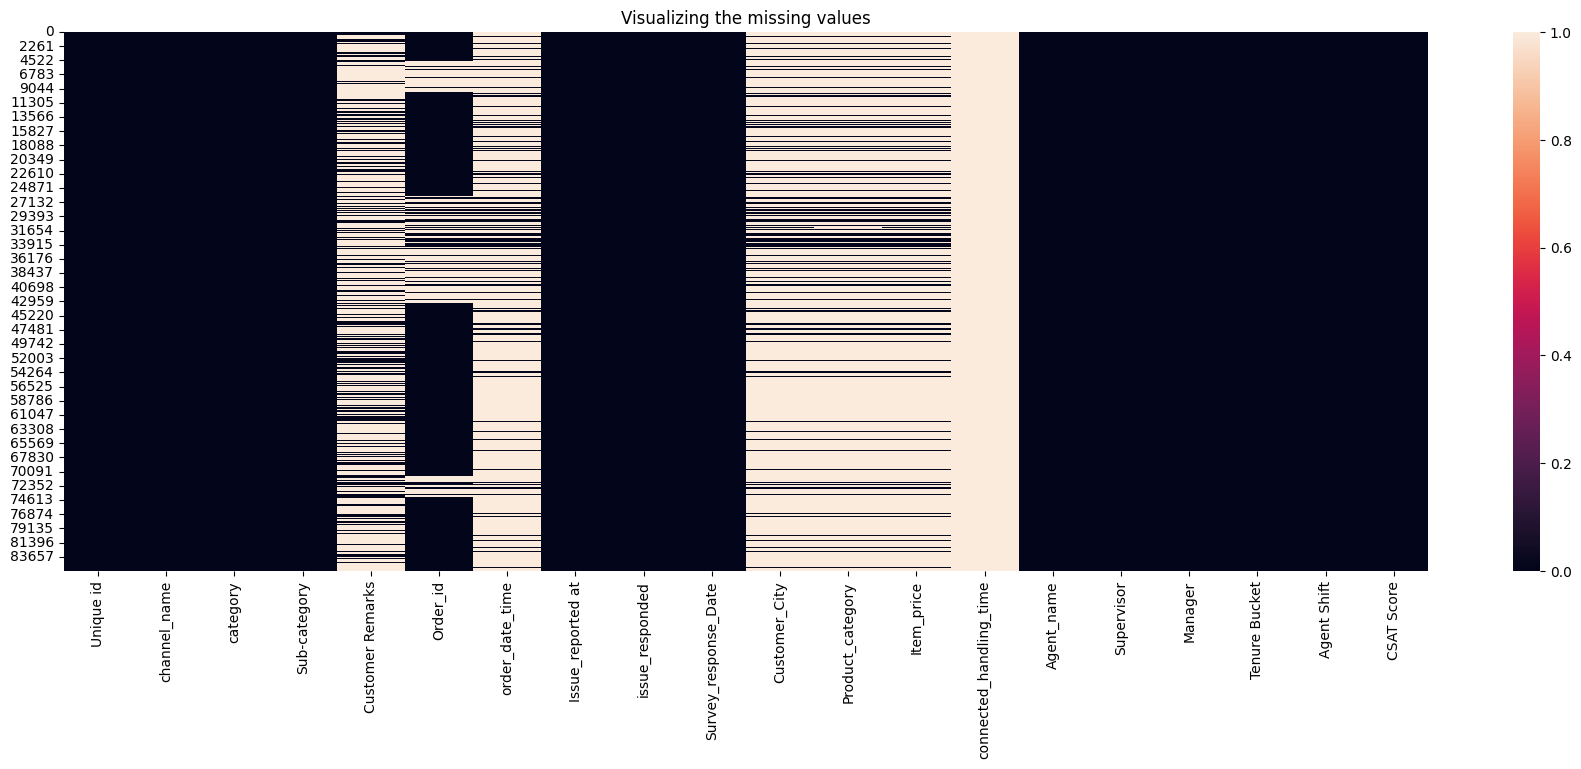

In [12]:
# Visualizing the missing values
plt.figure(figsize=(22,7))
sns.heatmap(customer_support_data.isna(), cbar=True)
plt.title("Visualizing the missing values")
plt.show()

### What did you know about your dataset?

#### Dataset Summary

- **Total number of rows**: 85,907
- **Total number of columns**: 20
- **Duplicate values**: None

The **target column** for this dataset is the **CSAT Score**.

#### Missing Values Overview

Some features contain missing values, Customer Remarks, Order ID, Order Date/Time, Customer City, Product Category, Item Price, Connected Handling Time.

Other features like **Unique id**, **Channel name**, **Category**, **Sub-category**, **Issue Reported At**, **Issue Responded**, **Survey Response Date**, **Agent Name**, **Supervisor**, **Manager**, **Tenure Bucket**, and **Agent Shift** do not contain any missing values.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
print(f"Dataset all columns name: {list(customer_support_data.columns)} \n")
customer_support_data.info()

Dataset all columns name: ['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-n

In [14]:
# Dataset Describe
customer_support_data.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


In [15]:
customer_support_data.describe(include=['object'])

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,85907,85907,85907,85907,85907
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,1371,40,6,5,5
top,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Inbound,Returns,Reverse Pickup Enquiry,Good,c27c9bb4-fa36-4140-9f1f-21009254ffdb,09/08/2023 11:55,15/08/2023 10:59,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,Wendy Taylor,Carter Park,John Smith,>90,Morning
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,429,4273,25261,30660,41426


### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
customer_support_data.nunique()

,0
Unique id,85907
channel_name,3
category,12
Sub-category,57
Customer Remarks,18231
Order_id,67675
order_date_time,13766
Issue_reported at,30923
issue_responded,30262
Survey_response_Date,31


In [17]:
# Unique Values for each variable that have less than 100 unique
customer_support_data.columns
column_list = customer_support_data.columns
for column_name in column_list:
  if customer_support_data[column_name].nunique() < 100:
    print(f"the unique values from column_name:'{column_name}' is--> \n {customer_support_data[column_name].unique()} \n")

the unique values from column_name:'channel_name' is--> 
 ['Outcall' 'Inbound' 'Email'] 

the unique values from column_name:'category' is--> 
 ['Product Queries' 'Order Related' 'Returns' 'Cancellation'
 'Shopzilla Related' 'Payments related' 'Refund Related' 'Feedback'
 'Offers & Cashback' 'Onboarding related' 'Others' 'App/website'] 

the unique values from column_name:'Sub-category' is--> 
 ['Life Insurance' 'Product Specific Information' 'Installation/demo'
 'Reverse Pickup Enquiry' 'Not Needed' 'Fraudulent User'
 'Exchange / Replacement' 'Missing' 'General Enquiry' 'Return request'
 'Delayed' 'Service Centres Related' 'Payment related Queries'
 'Order status enquiry' 'Return cancellation' 'Unable to track'
 'Seller Cancelled Order' 'Wrong' 'Invoice request' 'Priority delivery'
 'Refund Related Issues' 'Signup Issues' 'Online Payment Issues'
 'Technician Visit' 'UnProfessional Behaviour' 'Damaged'
 'Product related Issues' 'Refund Enquiry'
 'Customer Requested Modifications' 'Inst

In [18]:
customer_support_data['Survey_response_Date'] = pd.to_datetime(customer_support_data['Survey_response_Date'], format="mixed")

In [19]:
# checking start and end date in this dataset
print(f"start date in dataset ---> {customer_support_data['Survey_response_Date'].min()}")
print(f"last date in dataset ---> {customer_support_data['Survey_response_Date'].max()}")

start date in dataset ---> 2023-08-01 00:00:00
last date in dataset ---> 2023-08-31 00:00:00


## 3. ***Data Wrangling***

### Data Wrangling Code

In [20]:
# created new variables from date columns
customer_support_data['year'] = customer_support_data['Survey_response_Date'].dt.year
customer_support_data['month'] = customer_support_data['Survey_response_Date'].dt.month
customer_support_data['day'] = customer_support_data['Survey_response_Date'].dt.day

In [21]:
# for now we consider when number of unique value is less than 10 then it should be categorical columns
categorical_cols = [col for col in customer_support_data.columns if customer_support_data[col].nunique() < 10]
numeric_cols = list(set(customer_support_data.columns)-set(categorical_cols))

In [22]:
print(categorical_cols)

['channel_name', 'Product_category', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score', 'year', 'month']


In [23]:
print(numeric_cols)

['Survey_response_Date', 'Sub-category', 'day', 'Item_price', 'Agent_name', 'Unique id', 'category', 'connected_handling_time', 'issue_responded', 'Customer_City', 'Issue_reported at', 'Supervisor', 'Customer Remarks', 'order_date_time', 'Order_id']


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

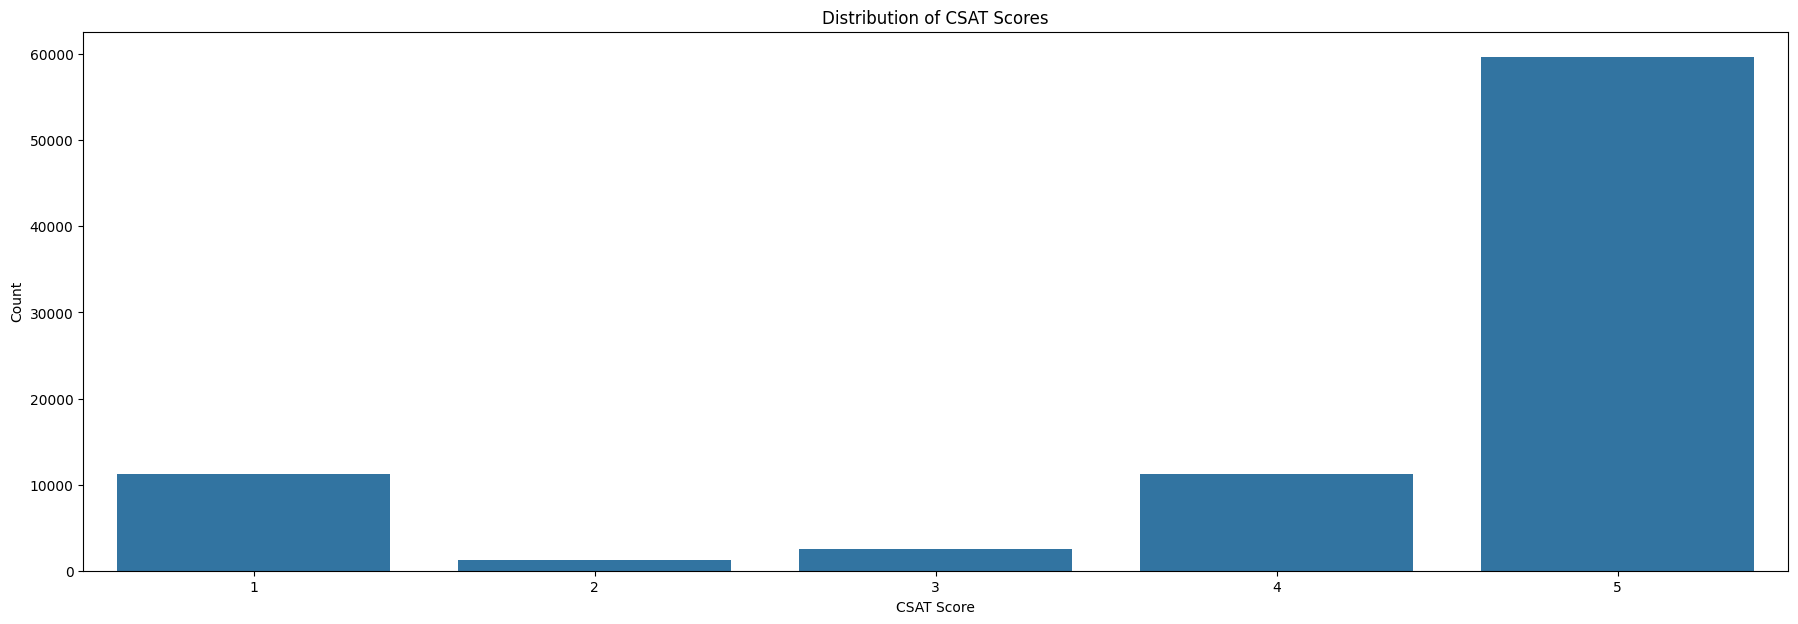

In [24]:
# Chart - 1 visualization code
plt.figure(figsize=(22, 7))
sns.countplot(x='CSAT Score', data=customer_support_data, order=[1, 2, 3, 4, 5])
plt.title('Distribution of CSAT Scores')
plt.xlabel('CSAT Score')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I selected this chart because it provides a clear view of how many customers have given each CSAT score. It helps in understanding the distribution of ratings and allows us to see the frequency of each rating (e.g., how many customers rated the organization with a 5, how many with a 4, and so on).

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that the majority of customers in the dataset have given a rating of 5, indicating a high level of satisfaction with the organization’s services. This suggests that the organization is performing well and meeting or exceeding customer expectations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can certainly contribute to positive business impact. A high rating, especially a score of 5, reflects customer satisfaction and loyalty, which can strengthen the brand's reputation and encourage repeat business. On the other hand, lower ratings (e.g., 1 or 2) can have a negative impact by signaling dissatisfaction, potentially harming the organization's reputation. If these low ratings are not addressed, it could lead to a perception that the organization’s services are subpar, possibly resulting in reduced customer retention and negative growth.

#### Chart - 2

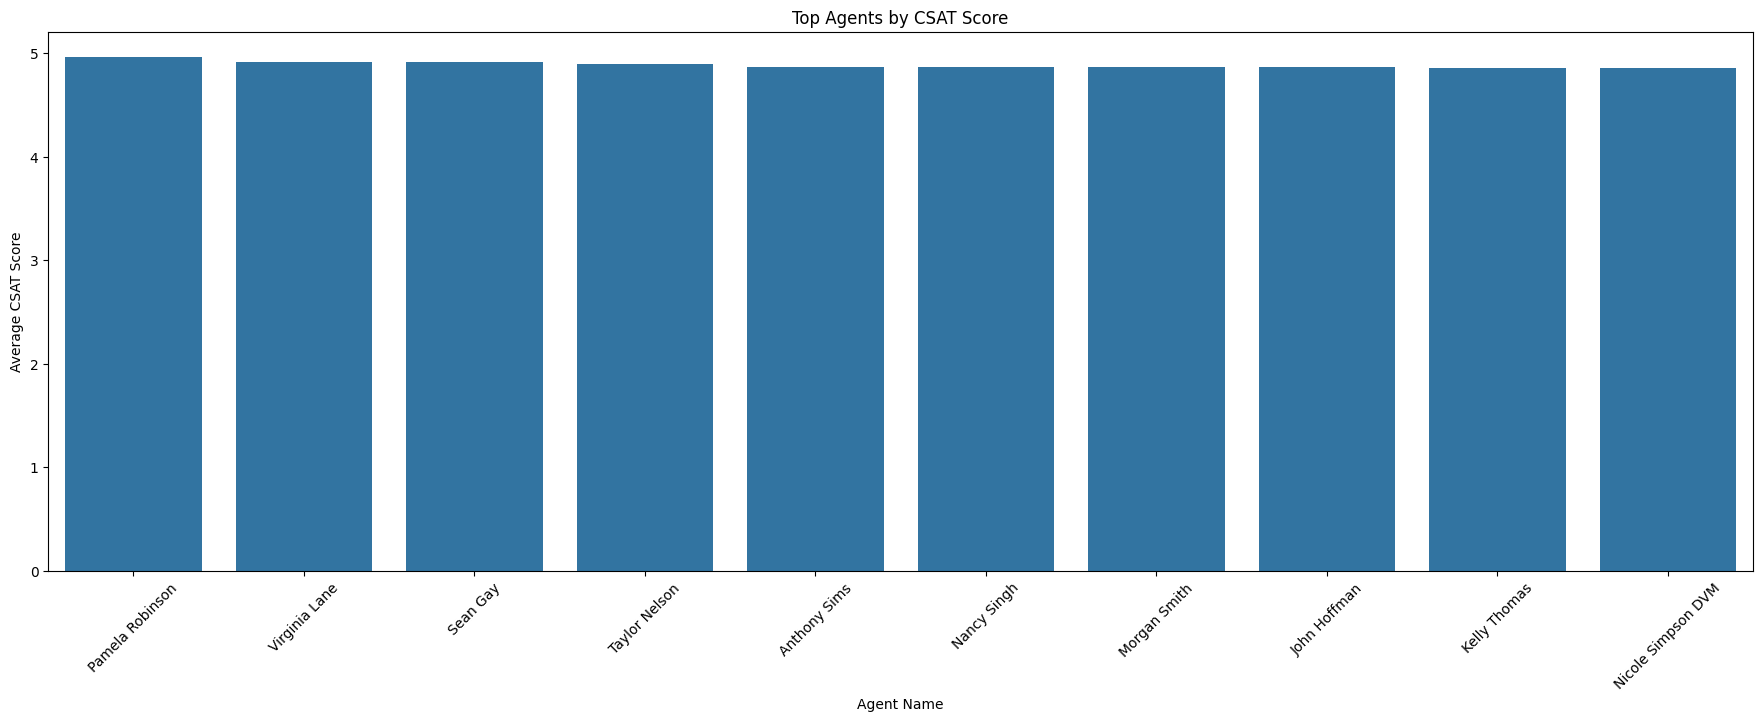

In [25]:
# Chart - 2 visualization code
average_csat = customer_support_data.groupby('Agent_name')['CSAT Score'].mean().reset_index()
top_agents = average_csat.nlargest(10, 'CSAT Score')

plt.figure(figsize=(22, 7))
sns.barplot(x='Agent_name', y='CSAT Score', data=top_agents)
plt.title('Top Agents by CSAT Score')
plt.xlabel('Agent Name')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I chose this chart because it provides a clear overview of the top-performing customer service agents based on their average CSAT scores. It helps identify which agents are most effective in delivering customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals which customer service agents have received the highest average CSAT scores, providing insight into the individuals who are excelling in customer satisfaction. This can help recognize and reward top performers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can contribute to a positive business impact by recognizing high-performing agents and potentially replicating their successful approaches across the team. On the other hand, if there are agents with low CSAT scores, it may highlight areas for improvement. Failing to address low scores could negatively impact customer satisfaction and, consequently, business growth.

#### Chart - 3

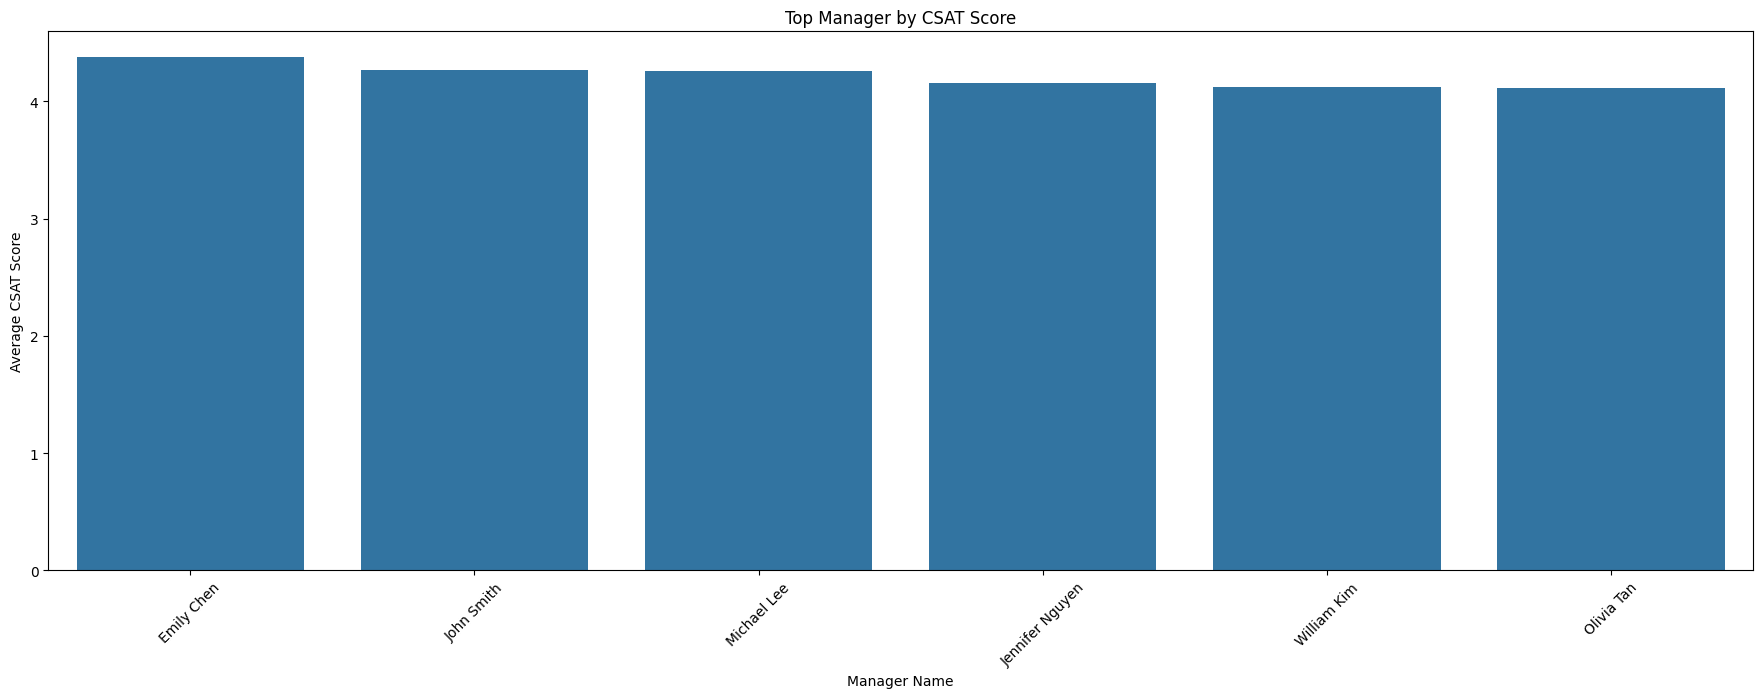

In [26]:
# Chart - 3 visualization code
average_csat = customer_support_data.groupby('Manager')['CSAT Score'].mean().reset_index()
top_managers = average_csat.nlargest(10, 'CSAT Score')

plt.figure(figsize=(22, 7))
sns.barplot(x='Manager', y='CSAT Score', data=top_managers)
plt.title('Top Manager by CSAT Score')
plt.xlabel('Manager Name')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I chose this chart because it provides valuable insights into the performance of managers based on the average CSAT scores they have received from customers. It highlights which managers are excelling in delivering customer satisfaction and where leadership strengths are contributing to business success.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals which managers have the highest average CSAT scores, indicating their effectiveness in managing teams and driving customer satisfaction. It provides insights into the leadership qualities that result in positive customer experiences, suggesting that these managerial practices could be leveraged to enhance business performance in other areas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can positively impact the business by recognizing high-performing managers whose leadership style fosters customer satisfaction. This recognition can be used to replicate successful practices across the organization. On the other hand, managers with lower CSAT scores could signal potential issues in leadership or customer service quality. If these gaps are not addressed, they could lead to dissatisfaction, reduced customer loyalty, and ultimately, negative business growth.

#### Chart - 4

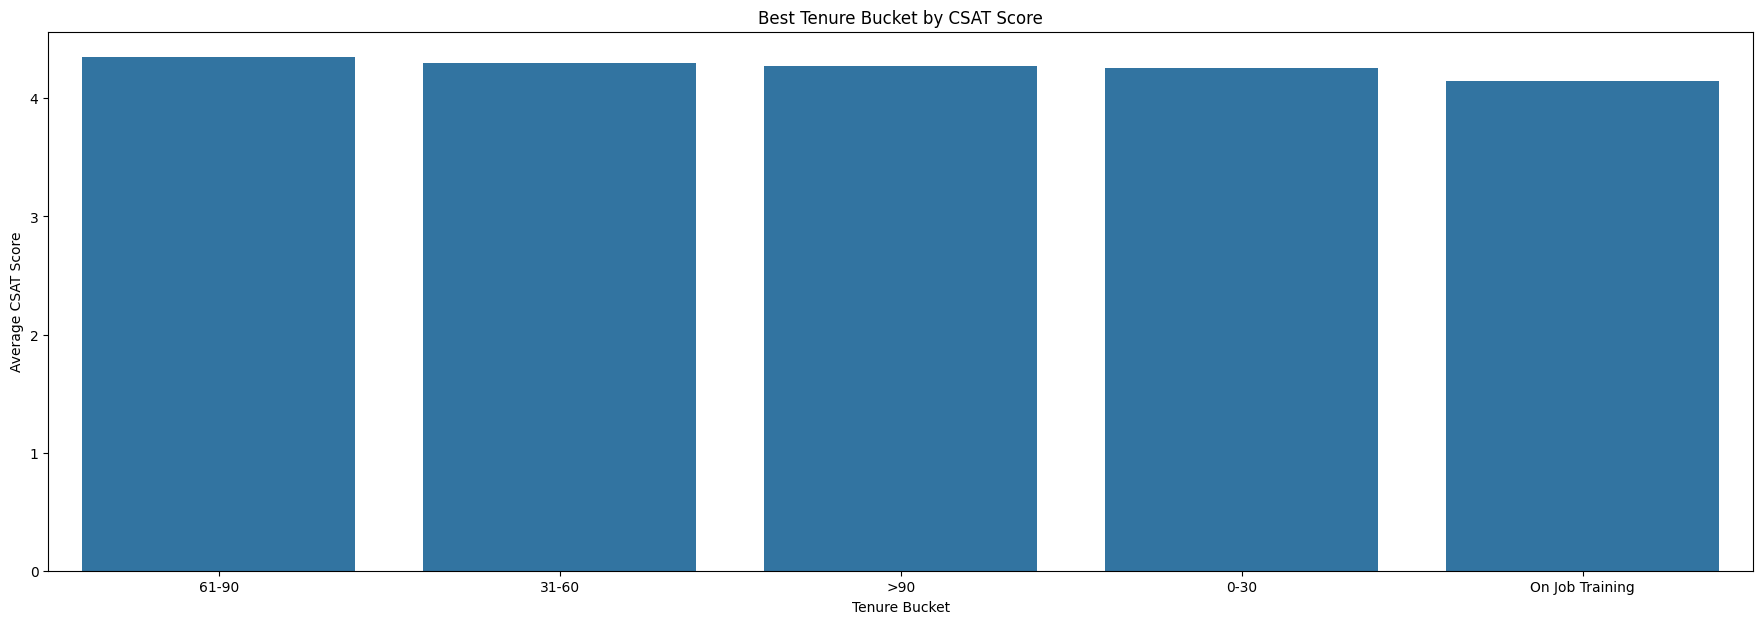

In [27]:
# Chart - 4 visualization code
average_csat = customer_support_data.groupby('Tenure Bucket')['CSAT Score'].mean().reset_index()
top_tenure_buckets = average_csat.nlargest(10, 'CSAT Score')

plt.figure(figsize=(22, 7))
sns.barplot(x='Tenure Bucket', y='CSAT Score', data=top_tenure_buckets)
plt.title('Best Tenure Bucket by CSAT Score')
plt.xlabel('Tenure Bucket')
plt.ylabel('Average CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

I chose this chart because it provides insights into the relationship between agent tenure and customer satisfaction (CSAT) scores. It highlights which tenure duration is associated with the highest average CSAT scores, helping to understand how agent experience or length of service impacts customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals which tenure buckets (e.g., 0-1 year, 1-3 years, etc.) have the highest average CSAT scores, providing valuable insights into how agent experience correlates with customer satisfaction. This can help identify whether more experienced agents tend to receive higher ratings or if newer agents are also performing well.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can contribute to a positive business impact by identifying which tenure groups perform best in terms of customer satisfaction. If longer tenure is associated with higher CSAT scores, organizations can focus on improving training and retention strategies for newer agents. Conversely, if new agents are struggling, targeted support and training can help improve their performance, preventing potential negative growth due to dissatisfaction.

#### Chart - 5

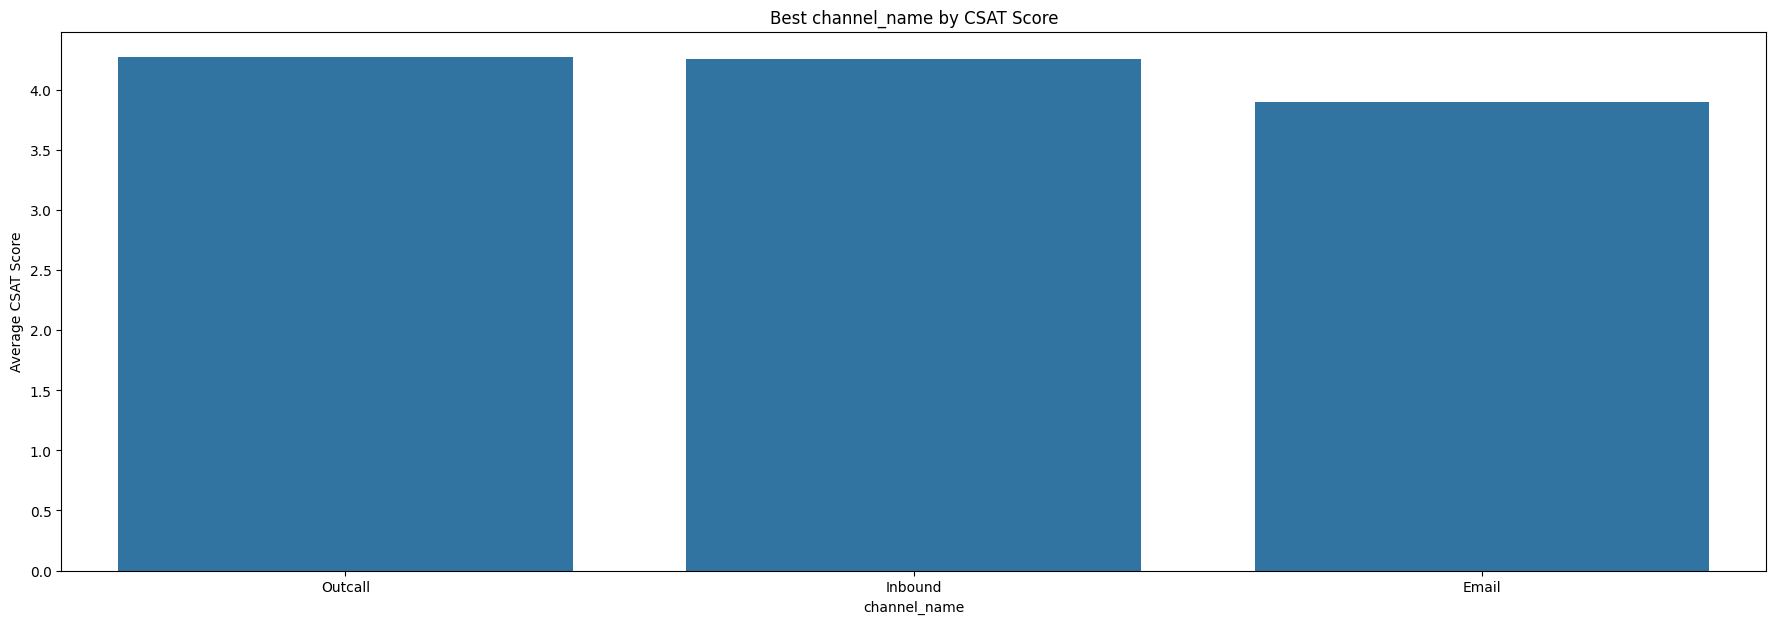

In [28]:
# Chart - 5 visualization code
average_csat = customer_support_data.groupby('channel_name')['CSAT Score'].mean().reset_index()
top_channel_name = average_csat.nlargest(10, 'CSAT Score')

plt.figure(figsize=(22, 7))
sns.barplot(x='channel_name', y='CSAT Score', data=top_channel_name)
plt.title('Best channel_name by CSAT Score')
plt.xlabel('channel_name')
plt.ylabel('Average CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

I selected this chart because it provides valuable insights into the performance of different communication channels based on the average CSAT scores. It helps identify which channels are most effective in delivering customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals which channels receive the highest average CSAT scores, indicating the most successful touchpoints for customer satisfaction. This insight can help focus resources and strategies on optimizing the best-performing channels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can create a positive business impact by highlighting high-performing channels, allowing the business to invest more in these areas to further enhance customer satisfaction. Conversely, channels with lower CSAT scores may need improvement or reevaluation. Ignoring these underperforming channels could lead to customer dissatisfaction, potentially hindering business growth.

#### Chart - 6

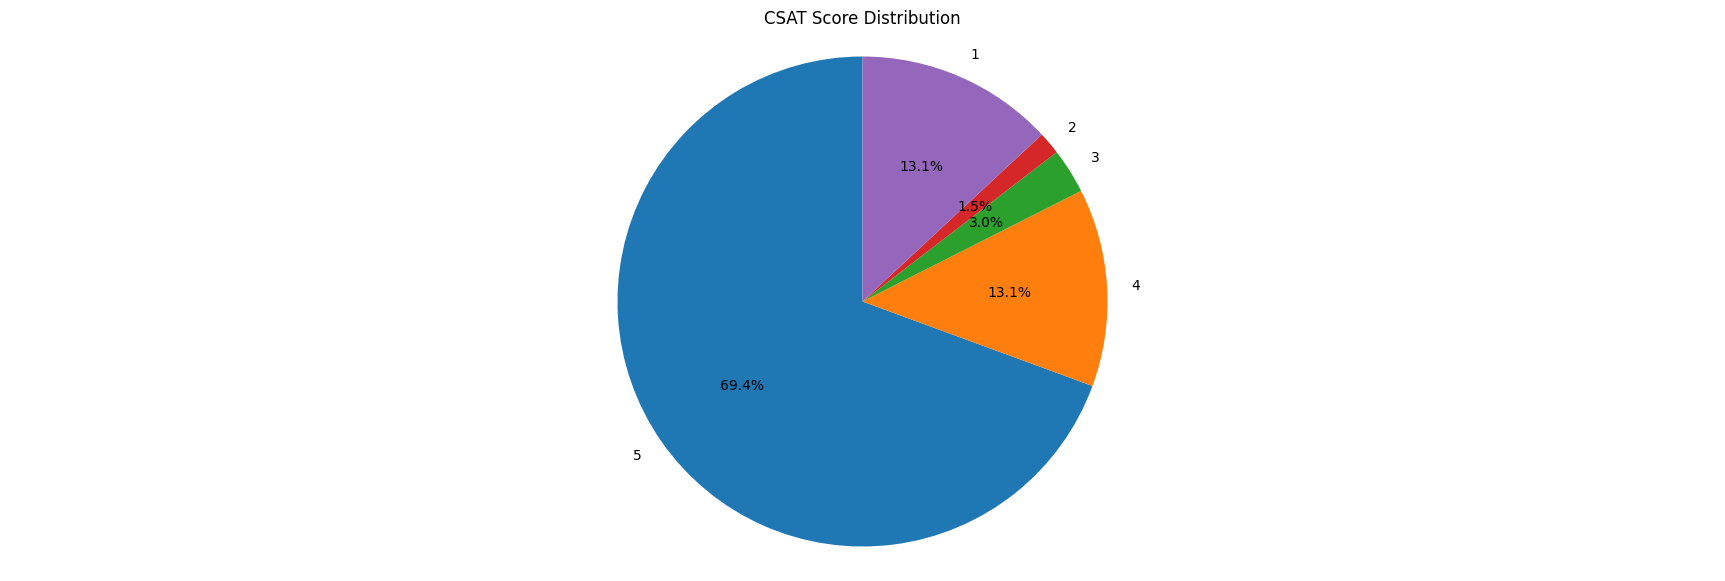

In [29]:
# Chart - 6 visualization code
csat_score_counts = customer_support_data['CSAT Score'].value_counts().sort_index(ascending=False)

plt.figure(figsize=(22, 7))
plt.pie(csat_score_counts, labels=csat_score_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('CSAT Score Distribution')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

I selected this chart because it provides a clear view of how many customers have given each CSAT score. It helps in understanding the distribution of ratings and allows us to see the frequency of each rating (e.g., how many customers rated the organization with a 5, how many with a 4, and so on).

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that the majority of customers in the dataset have given a rating of 5, indicating a high level of satisfaction with the organization’s services. This suggests that the organization is performing well and meeting or exceeding customer expectations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can certainly contribute to positive business impact. A high rating, especially a score of 5, reflects customer satisfaction and loyalty, which can strengthen the brand's reputation and encourage repeat business. On the other hand, lower ratings (e.g., 1 or 2) can have a negative impact by signaling dissatisfaction, potentially harming the organization's reputation. If these low ratings are not addressed, it could lead to a perception that the organization’s services are subpar, possibly resulting in reduced customer retention and negative growth.

#### Chart - 14 - Correlation Heatmap

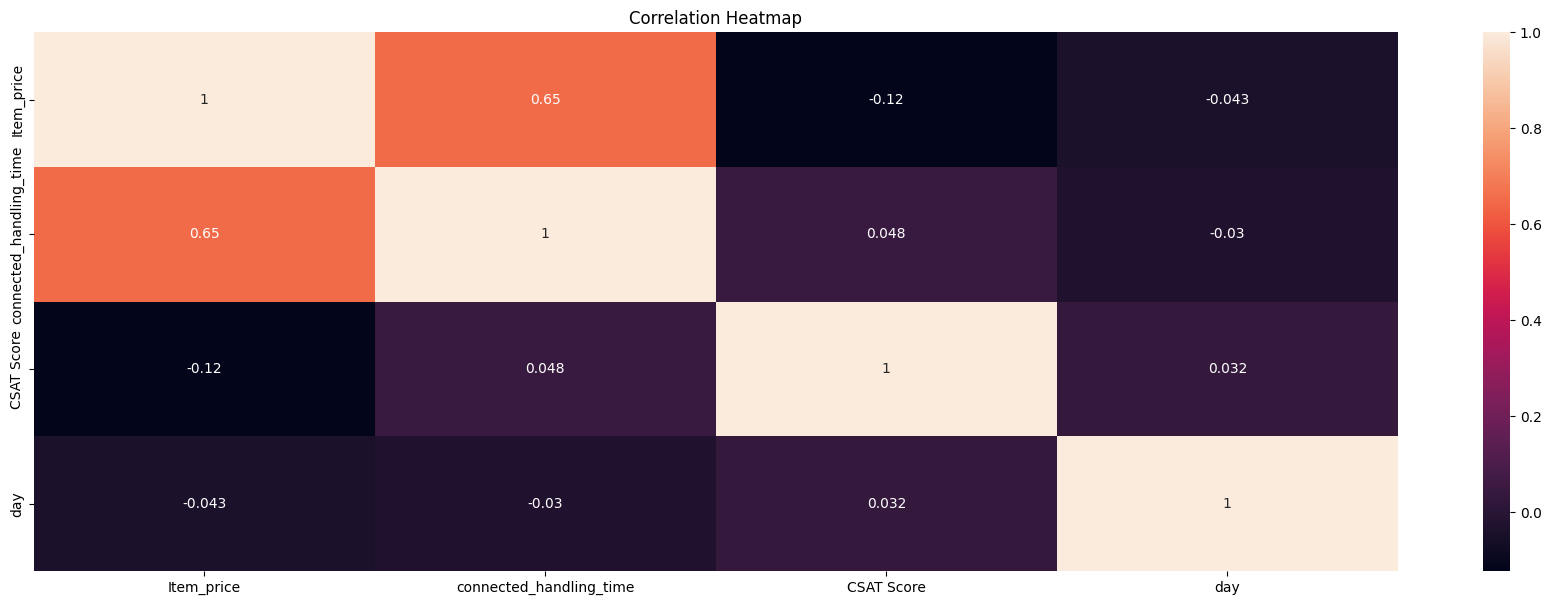

In [30]:
# Correlation Heatmap visualization code
# correlation
filtered_data = customer_support_data.drop(columns=['year', 'month'])
corr_df = filtered_data.corr(method='pearson', numeric_only=True)

# Heatmap visualization
plt.figure(figsize=(22, 7))
sns.heatmap(corr_df, annot=True)
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

I chose the correlation heatmap because it provides a clear, visual representation of the relationships between different numerical variables in the dataset. It helps to easily identify which variables are positively or negatively correlated and to what degree. This is particularly useful for understanding potential dependencies and associations between factors.

##### 2. What is/are the insight(s) found from the chart?

The heatmap reveals the strength and direction of correlations between various numerical variables. For example:

- Strong positive correlations indicate that as one variable increases, the other tends to increase as well.
- Strong negative correlations suggest that when one variable increases, the other decreases.
- Weak or no correlations highlight variables that do not directly influence each other.


Identifying these relationships helps in understanding the factors that may drive customer satisfaction and operational efficiency, guiding future improvements or strategies.

#### Chart - 15 - Pair Plot

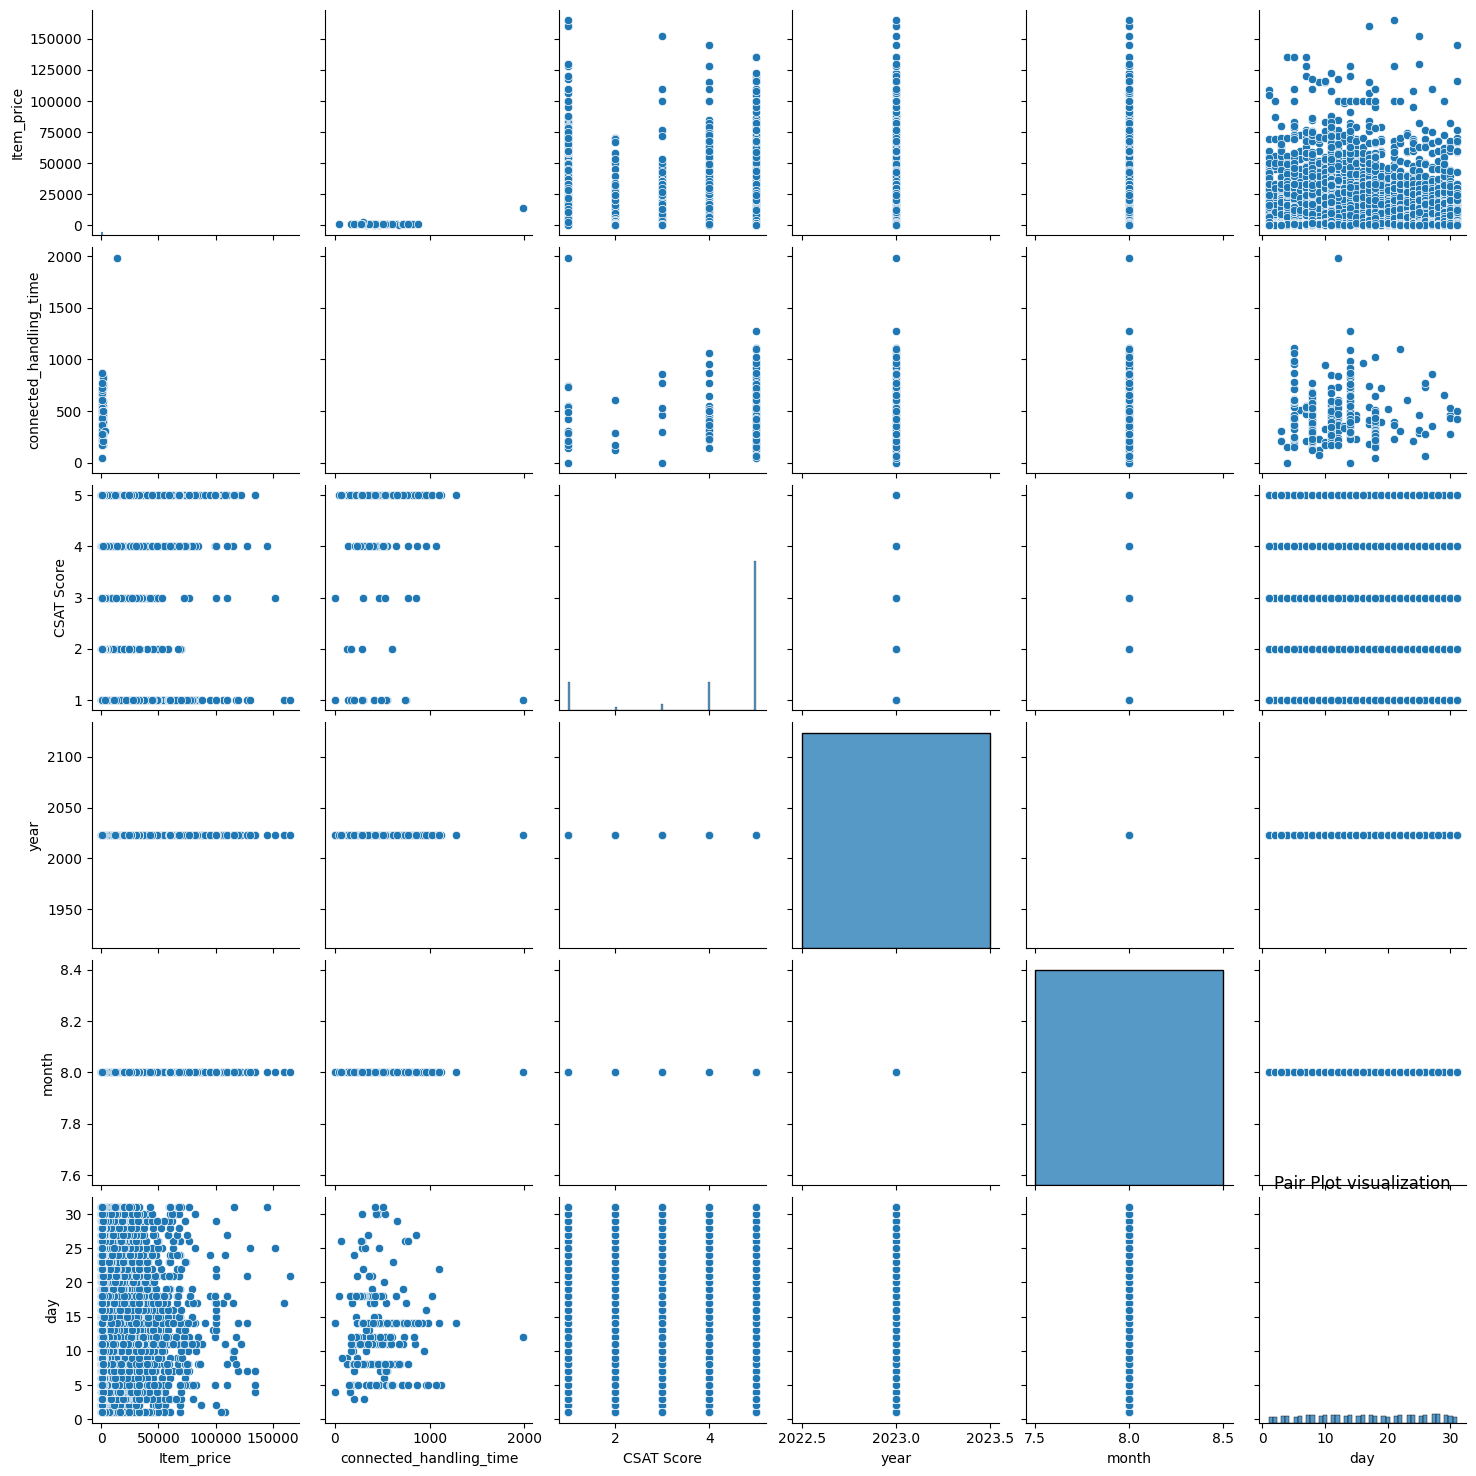

In [31]:
# Pair Plot visualization code
sns.pairplot(customer_support_data)
plt.title("Pair Plot visualization")
plt.show()

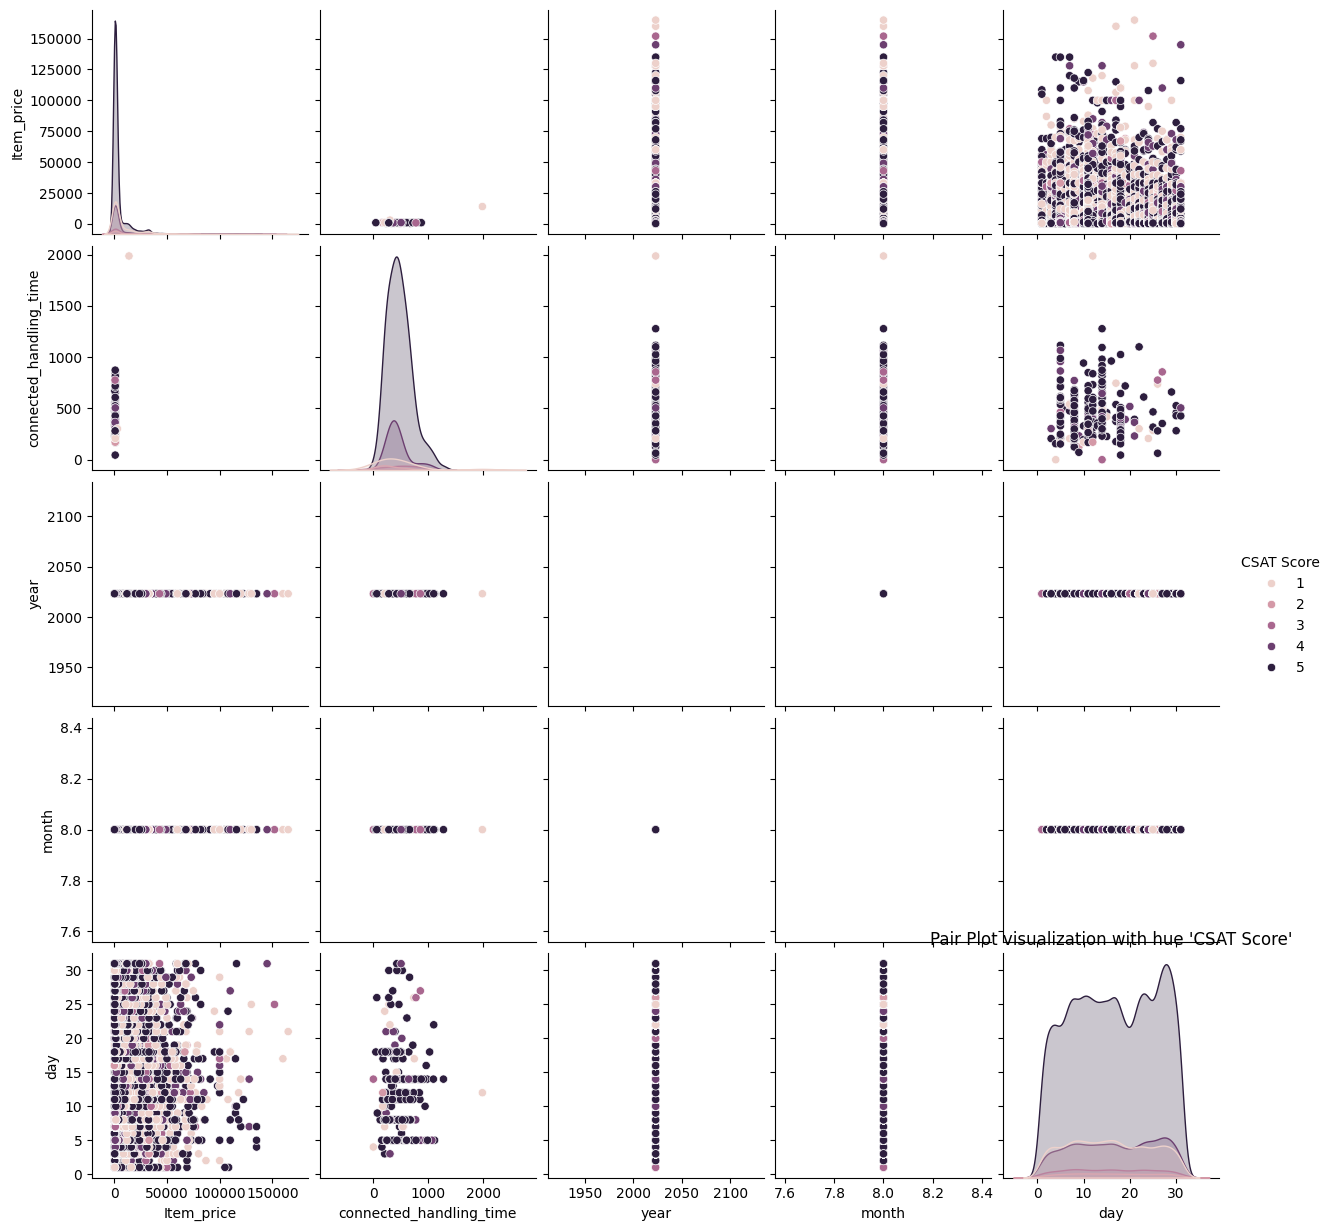

In [32]:
# Pair Plot visualization code
sns.pairplot(customer_support_data, hue="CSAT Score")
plt.title("Pair Plot visualization with hue 'CSAT Score'")
plt.show()

##### 1. Why did you pick the specific chart?

I chose the pairplot because it provides a comprehensive view of pairwise relationships between multiple numerical variables in the dataset. This visualization allows us to easily identify trends, correlations, and distributions across different combinations of features, as well as to detect potential outliers and patterns. Pairplots are especially useful for getting an overview of how variables interact with each other and understanding their distributions.

##### 2. What is/are the insight(s) found from the chart?

The pairplot reveals several important insights:

- Correlations: By examining the scatterplots in the pairwise grid, we can identify positive or negative correlations between variables (e.g., if customer satisfaction increases with response time or resolution time).
- Distributions: The diagonal of the pairplot shows the distribution of individual variables, helping us understand the spread and skewness of each feature.
- Potential Outliers: Outliers in the data may become visible in the scatterplots and distribution plots, providing clues for further investigation or data cleaning.
- Relationships: Some variables may show linear or non-linear relationships, while others may appear independent or weakly correlated.

This chart helps highlight key relationships that can be used to refine business strategies, such as improving customer service based on variables that have a strong correlation with satisfaction.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [33]:
# Handling Missing Values & Missing Value Imputation
customer_support_data.isna().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


In [34]:
customer_support_data["Item_price"].fillna(customer_support_data["Item_price"].median(), inplace=True)
customer_support_data["connected_handling_time"].fillna(customer_support_data["connected_handling_time"].median(), inplace=True)
customer_support_data["Customer Remarks"].fillna("blank_remarks", inplace=True)
customer_support_data["Customer_City"].fillna("Unknown", inplace=True)
customer_support_data["Product_category"].fillna("Unknown", inplace=True)


In [35]:
#checking percentage of null values in each column
round(100*(customer_support_data.isnull().sum()/len(customer_support_data.index)), 2)

,0
Unique id,0.00
channel_name,0.00
category,0.00
Sub-category,0.00
Customer Remarks,0.00
Order_id,21.22
order_date_time,79.96
Issue_reported at,0.00
issue_responded,0.00
Survey_response_Date,0.00


In [36]:
# we will drop the columns having more than 70% NA values.
customer_support_data = customer_support_data.drop(customer_support_data.loc[:,list(round(100*(customer_support_data.isnull().sum()/len(customer_support_data.index)), 2)>70)].columns, axis=1)

In [37]:
#checking percentage of null values in each column
round(100*(customer_support_data.isnull().sum()/len(customer_support_data.index)), 2)

,0
Unique id,0.00
channel_name,0.00
category,0.00
Sub-category,0.00
Customer Remarks,0.00
Order_id,21.22
Issue_reported at,0.00
issue_responded,0.00
Survey_response_Date,0.00
Customer_City,0.00


In [38]:
# order id is not important column that's why drop this
customer_support_data.drop(columns=["Order_id"], inplace=True)

In [39]:
#checking percentage of null values in each column
round(100*(customer_support_data.isnull().sum()/len(customer_support_data.index)), 2)

,0
Unique id,0.0
channel_name,0.0
category,0.0
Sub-category,0.0
Customer Remarks,0.0
Issue_reported at,0.0
issue_responded,0.0
Survey_response_Date,0.0
Customer_City,0.0
Product_category,0.0


In [40]:
customer_support_data['Survey_response_Date'] = pd.to_datetime(customer_support_data['Survey_response_Date'], format="mixed")
customer_support_data['issue_responded'] = pd.to_datetime(customer_support_data['issue_responded'], format="mixed")
customer_support_data['Issue_reported at'] = pd.to_datetime(customer_support_data['Issue_reported at'], format="mixed")

In [41]:
customer_support_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unique id                85907 non-null  object        
 1   channel_name             85907 non-null  object        
 2   category                 85907 non-null  object        
 3   Sub-category             85907 non-null  object        
 4   Customer Remarks         85907 non-null  object        
 5   Issue_reported at        85907 non-null  datetime64[ns]
 6   issue_responded          85907 non-null  datetime64[ns]
 7   Survey_response_Date     85907 non-null  datetime64[ns]
 8   Customer_City            85907 non-null  object        
 9   Product_category         85907 non-null  object        
 10  Item_price               85907 non-null  float64       
 11  connected_handling_time  85907 non-null  float64       
 12  Agent_name               85907 n

### 3. Categorical Encoding

In [42]:
# one hot encoding categorical variables
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
ohe.fit(customer_support_data[['Agent Shift', 'Tenure Bucket', 'Manager', 'Supervisor', 'Product_category', 'category', 'channel_name']])
encoded_var = ohe.transform(customer_support_data[['Agent Shift', 'Tenure Bucket', 'Manager', 'Supervisor', 'Product_category', 'category', 'channel_name']])
encoded_df = pd.DataFrame(encoded_var.toarray(), columns=ohe.get_feature_names_out(), dtype=int)

In [43]:
encoded_df.head()

,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training,Manager_Jennifer Nguyen,Manager_John Smith,...,category_Onboarding related,category_Order Related,category_Others,category_Payments related,category_Product Queries,category_Refund Related,category_Returns,category_Shopzilla Related,channel_name_Inbound,channel_name_Outcall
0,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
customer_support_data.shape

(85907, 21)

In [45]:
customer_support_data_ = pd.concat([customer_support_data[['CSAT Score','year','month','day']], encoded_df], axis=1)

In [46]:
customer_support_data_.shape

(85907, 78)

### 8. Data Splitting

In [47]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X = customer_support_data_.drop(columns=['CSAT Score'])
y = customer_support_data_['CSAT Score']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
print(f"X_train shape--> {X_train.shape}")
print(f"X_test shape--> {X_test.shape}")
print(f"y_train shape--> {y_train.shape}")
print(f"y_test shape--> {y_test.shape}")

X_train shape--> (68725, 77)
X_test shape--> (17182, 77)
y_train shape--> (68725,)
y_test shape--> (17182,)


In [54]:
X_train.sample(5)

,year,month,day,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,...,category_Onboarding related,category_Order Related,category_Others,category_Payments related,category_Product Queries,category_Refund Related,category_Returns,category_Shopzilla Related,channel_name_Inbound,channel_name_Outcall
62755,2023,8,24,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
26165,2023,8,11,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4558,2023,8,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
21199,2023,8,8,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
60636,2023,8,23,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [55]:
X_test.sample(5)

,year,month,day,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,...,category_Onboarding related,category_Order Related,category_Others,category_Payments related,category_Product Queries,category_Refund Related,category_Returns,category_Shopzilla Related,channel_name_Inbound,channel_name_Outcall
16787,2023,8,7,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
8341,2023,8,4,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
11477,2023,8,6,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
60424,2023,8,23,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
11076,2023,8,6,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [56]:
y_train.sample(5)

,CSAT Score
53292,5
71458,5
57311,5
71554,4
62238,5


In [57]:
y_test.sample(5)

,CSAT Score
1139,4
72604,4
24049,5
48267,5
61595,5
